# Momento de Retroalimentación: Módulo 1 Técnicas de procesamiento de datos para el análisis estadístico y para la construcción de modelos (Portafolio Análisis)

Nombre: Marcelo Márquez Murillo  
Matricula: A01720588  

Una empresa automovilística china aspira a entrar en el mercado estadounidense. Desea establecer allí una unidad de fabricación y producir automóviles localmente para competir con sus contrapartes estadounidenses y europeas. Contrataron una empresa de consultoría de automóviles para identificar los principales factores de los que depende el precio de los automóviles, específicamente, en el mercado estadounidense, ya que pueden ser muy diferentes del mercado chino. Esencialmente, la empresa quiere saber:
* Qué variables son significativas para predecir el precio de un automóvil
* Qué tan bien describen esas variables el precio de un automóvil


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('precios_autos.csv')
df

,symboling,CarName,fueltype,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginetype,cylindernumber,enginesize,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,convertible,rwd,front,88.6,168.8,64.1,48.8,...,dohc,four,130,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,convertible,rwd,front,88.6,168.8,64.1,48.8,...,dohc,four,130,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,ohcv,six,152,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,sedan,fwd,front,99.8,176.6,66.2,54.3,...,ohc,four,109,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,sedan,4wd,front,99.4,176.6,66.4,54.3,...,ohc,five,136,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,sedan,rwd,front,109.1,188.8,68.9,55.5,...,ohc,four,141,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,sedan,rwd,front,109.1,188.8,68.8,55.5,...,ohc,four,141,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,sedan,rwd,front,109.1,188.8,68.9,55.5,...,ohcv,six,173,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,sedan,rwd,front,109.1,188.8,68.9,55.5,...,ohc,six,145,3.40,23.0,106,4800,26,27,22470.0


## Exploración de la base de datos

### 1. Calcula medidas estadísticas apropiadas para las variables cuantitativas (media, desviación estándar, cuantiles, etc.) y para las cualitativas (cuantiles, frecuencias)

In [4]:
# Variables cuantitativas
quantitative_columns = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']
quantitative_df = df[quantitative_columns]
quantitative_df.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
# Variables categóricas
categorical_columns = ['symboling', 'CarName', 'fueltype', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber']
categorical_df = df[categorical_columns]
categorical_df

,symboling,CarName,fueltype,carbody,drivewheel,enginelocation,enginetype,cylindernumber
0,3,alfa-romero giulia,gas,convertible,rwd,front,dohc,four
1,3,alfa-romero stelvio,gas,convertible,rwd,front,dohc,four
2,1,alfa-romero Quadrifoglio,gas,hatchback,rwd,front,ohcv,six
3,2,audi 100 ls,gas,sedan,fwd,front,ohc,four
4,2,audi 100ls,gas,sedan,4wd,front,ohc,five
...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,sedan,rwd,front,ohc,four
201,-1,volvo 144ea,gas,sedan,rwd,front,ohc,four
202,-1,volvo 244dl,gas,sedan,rwd,front,ohcv,six
203,-1,volvo 246,diesel,sedan,rwd,front,ohc,six


### 2. Explora los datos usando herramientas de visualización:

* Variables cuantitativas:
    - Medidas de posición: cuartiles, outlier (valores atípicos), boxplots
    - Análisis de distribución de los datos (Histogramas). Identificar si tiene forma simétrica o asimétrica
    - Analiza colinealidad (coeficiente de correlación y diagramas de dispersión)

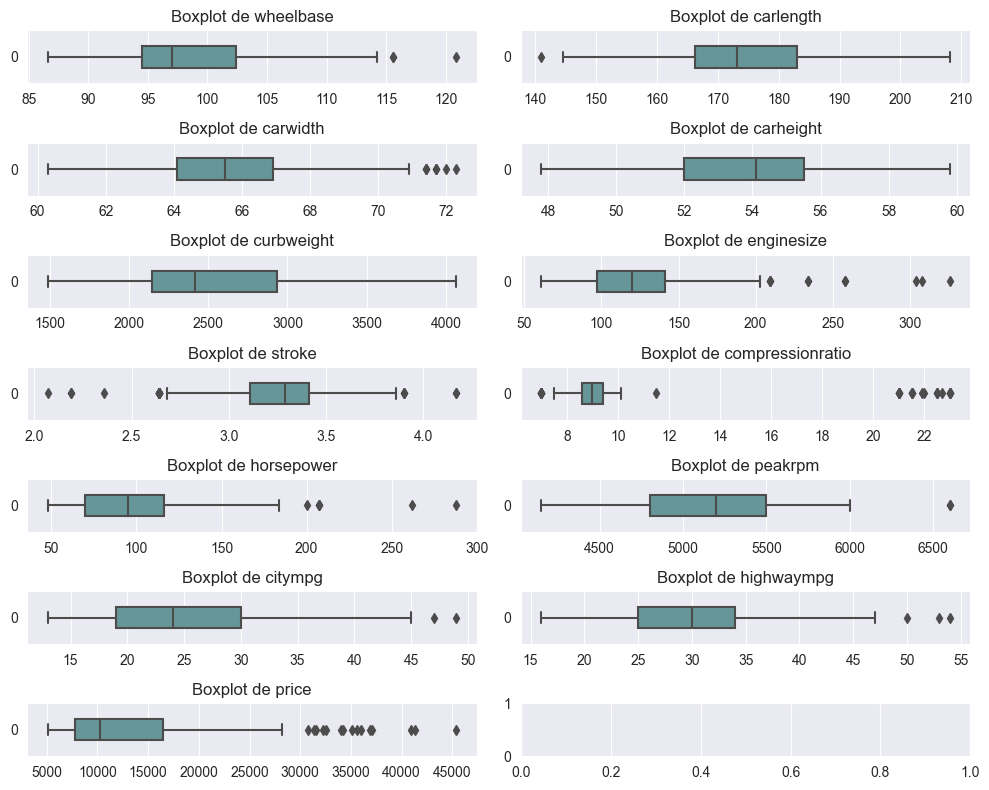

In [6]:
# Medidas de posición
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(10, 8))

# Iterar sobre los subplots y las columnas
for ax, column in zip(axes.flatten(), quantitative_df):
    sns.boxplot(data=quantitative_df[column], orient="h", width=0.4, ax=ax, color="cadetblue")
    ax.set_title(f"Boxplot de {column}")

plt.tight_layout()
plt.show()

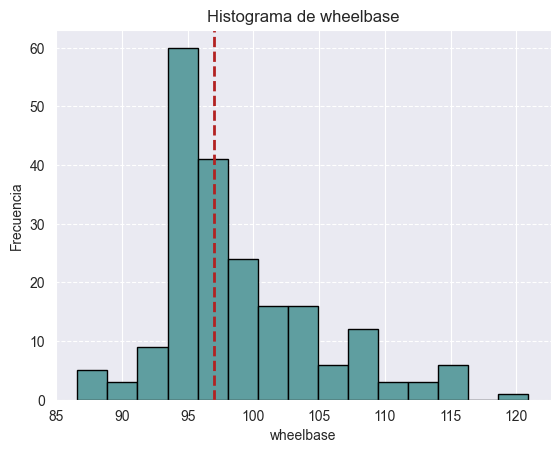

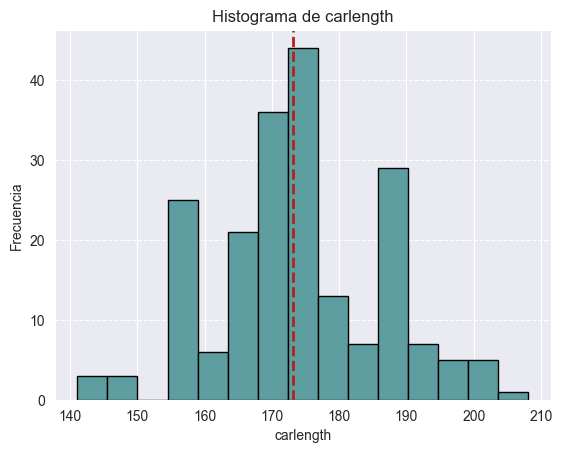

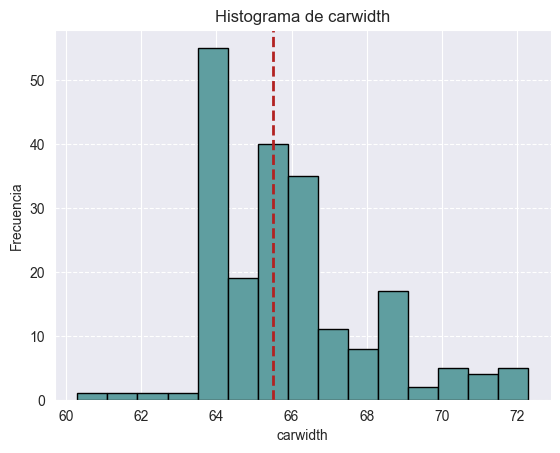

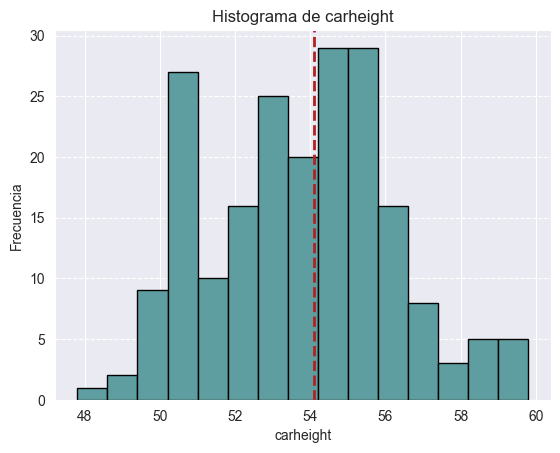

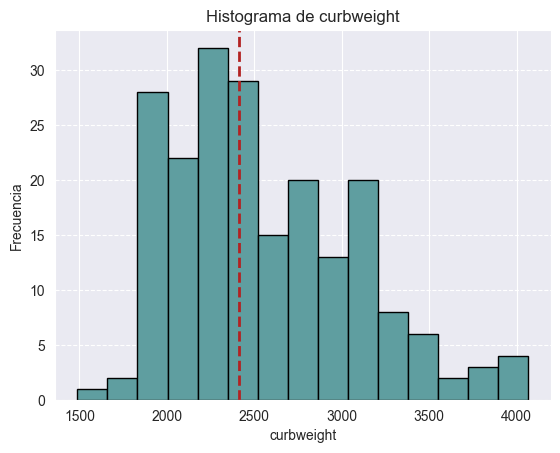

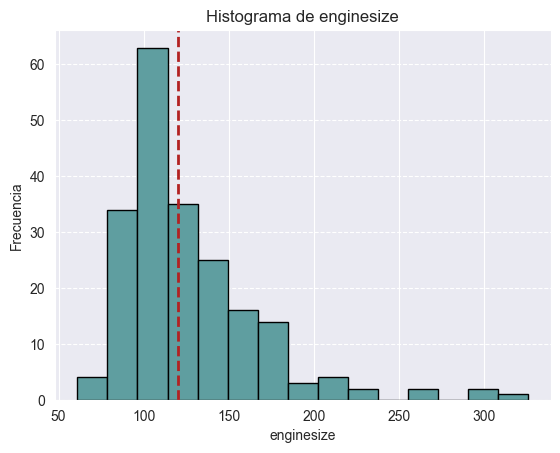

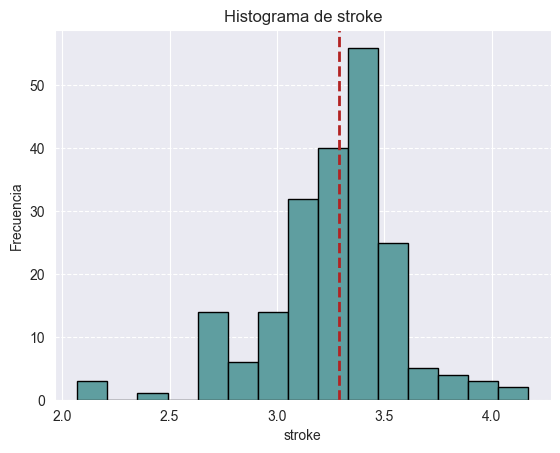

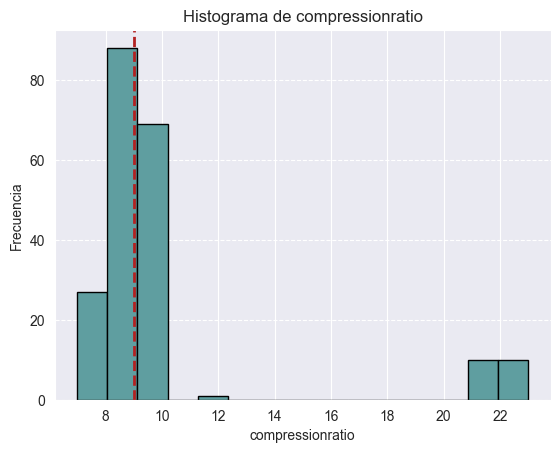

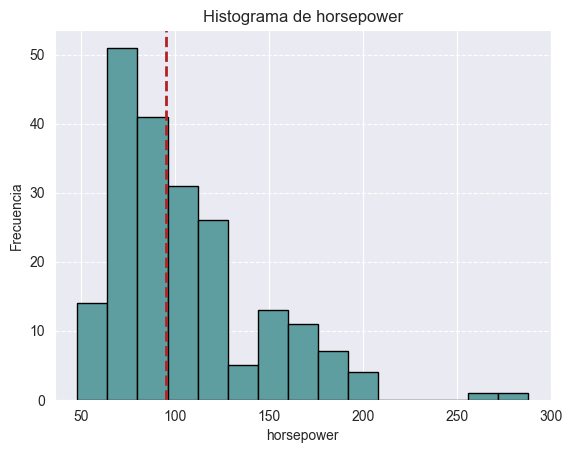

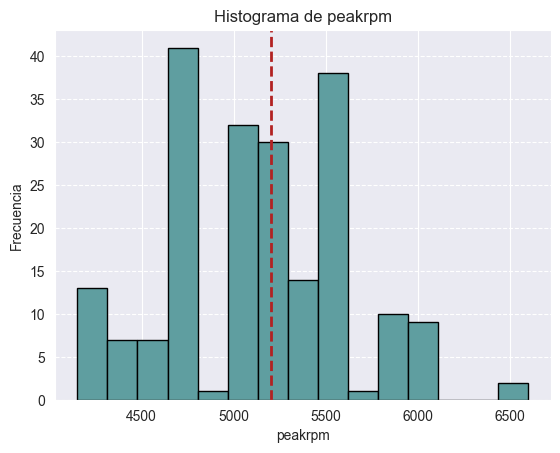

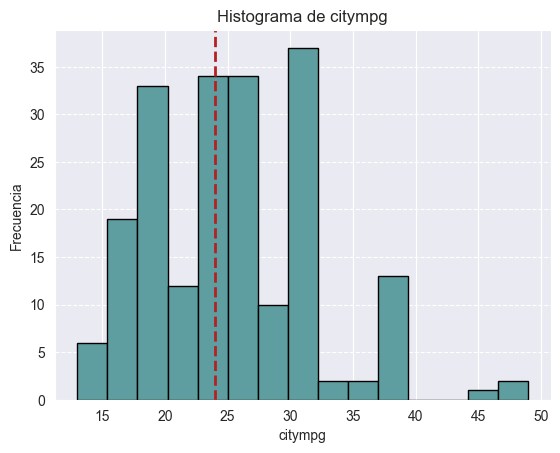

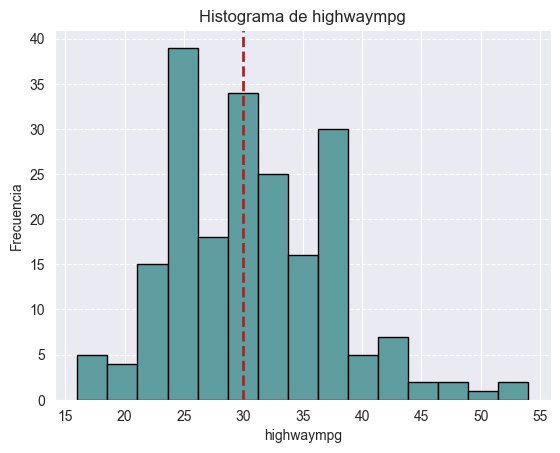

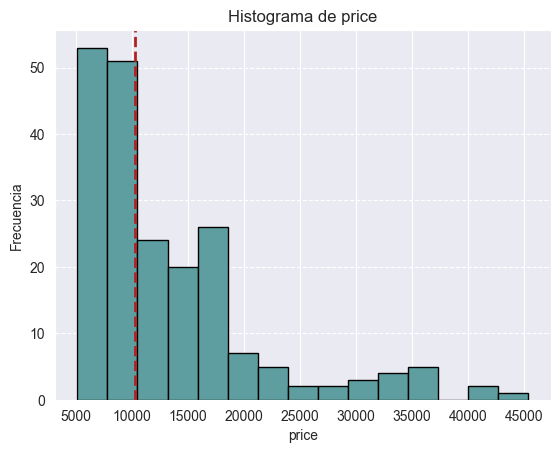

In [7]:
# Histogramas de los datos
for column in quantitative_df.columns:
    plt.hist(quantitative_df[column], bins=15, color='cadetblue', edgecolor='black')  # Adjust the number of bins as needed
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.grid(axis='y', linestyle='--', alpha=1.0)
    # Conseguir la mediana de los datos
    median = quantitative_df[column].median()
    plt.axvline(median, color='firebrick', linestyle='dashed', linewidth=2, label='Median')
    plt.show()

A partir de las gráficas se puede observar que as variables que tienen un comportamiento simétrico son carlength, carheight y peakrpm. 

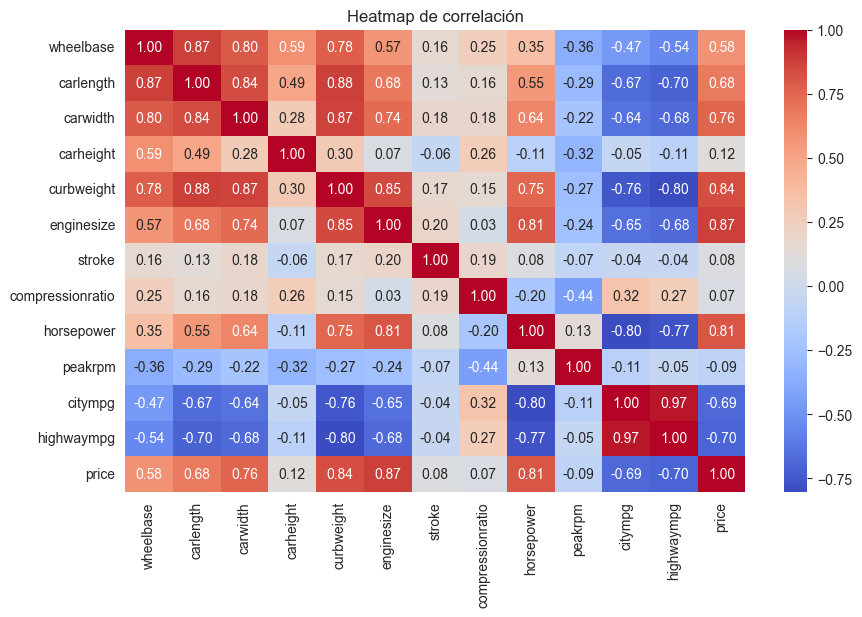

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
stroke,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984
horsepower,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139
peakrpm,-0.360469,-0.287242,-0.220012,-0.320411,-0.266243,-0.244660,-0.067964,-0.435741,0.131073,1.000000,-0.113544,-0.054275,-0.085267


In [8]:
# Analiza colinealidad
plt.figure(figsize=(10, 6))
sns.heatmap(quantitative_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap de correlación')
plt.show()

quantitative_df.corr()

Se puede observar del diagrama de correlación lo siguiente:
* La variable citympg y highway mpg tienen una correlación de 0.97 lo cual se aproxima a 1 por lo que se considera que ambas tienen colinealidad
* La variable highway mpg tiene una corrlación negativa y alta en relación con price por lo que puede ser una muy buena variable para el modelo
* Bajo la misma observación se puede considerar que las variables enginesize, horsepower, wheelbase, carlength y carwidth pueden ser variables que ayuden a explicar el comportamiento de la variable price con base en su coeficiente de correlación. 

* Variables categóricas
        - Distribución de los datos (diagramas de barras, diagramas de pastel)
        - Analiza asociación o colinealidad (diagramas de caja y bigote de precio por categoría y barras por categoría)

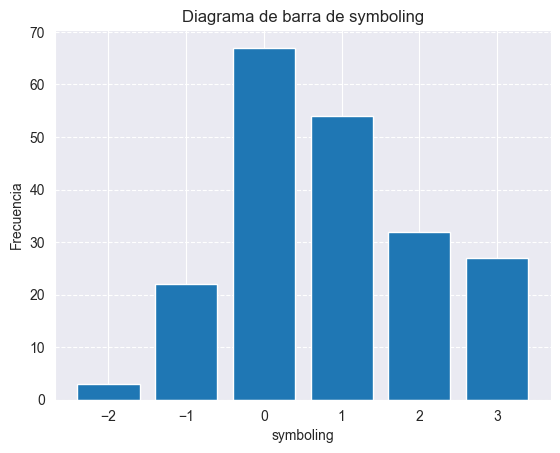

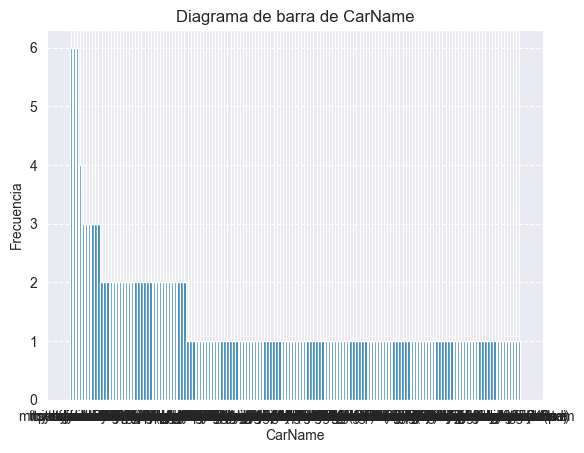

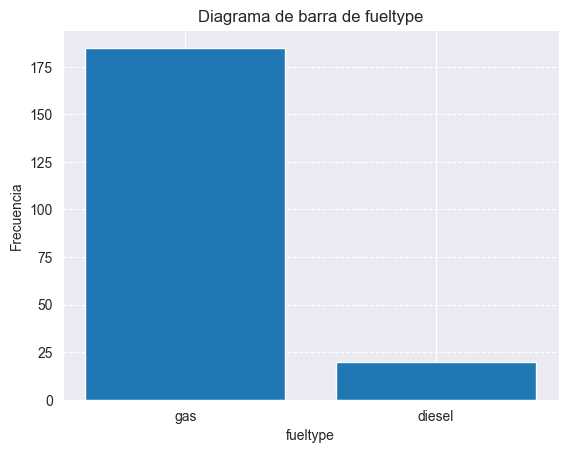

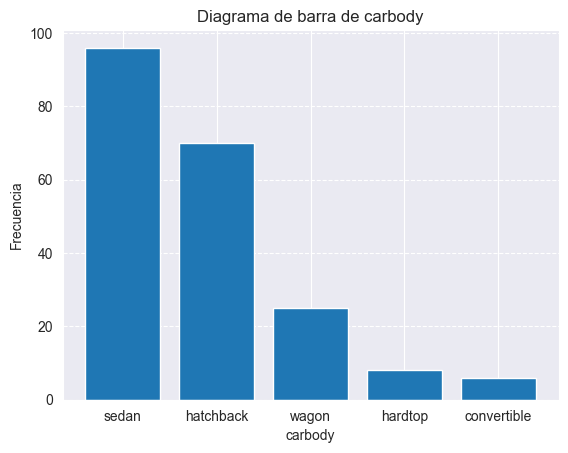

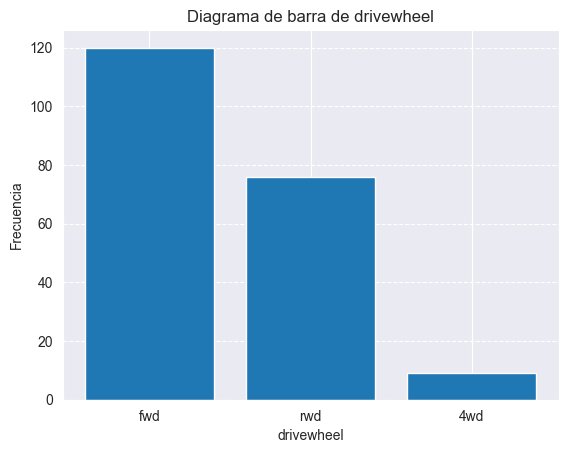

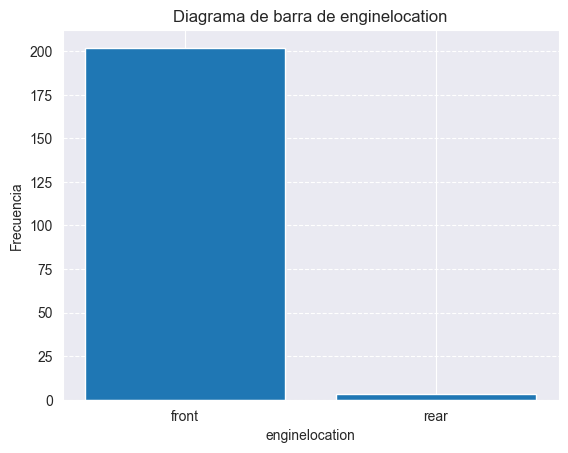

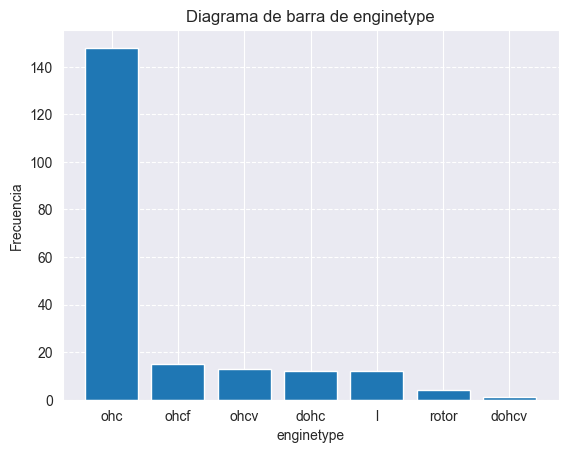

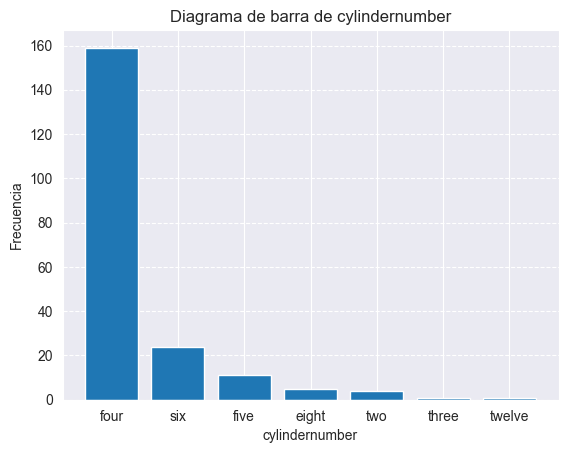

In [9]:
# Distribución de los datos

for column in categorical_df.columns:
    selected_column = categorical_df[column].value_counts()
    labels = selected_column.index
    counts = selected_column.values
    plt.bar(labels, counts)
    plt.title(f"Diagrama de barra de {column}")
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.grid(axis='y', linestyle='--', alpha=1.0)
    plt.show()

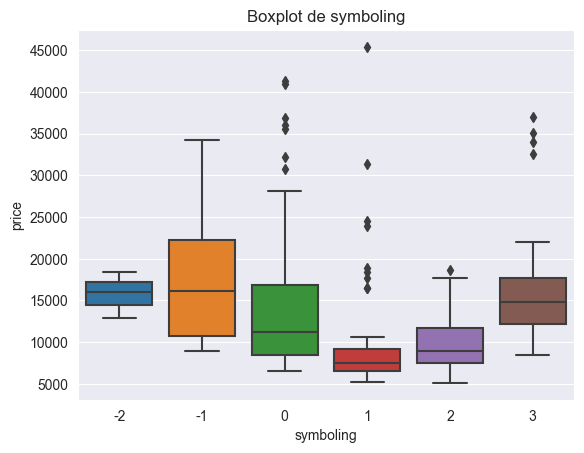

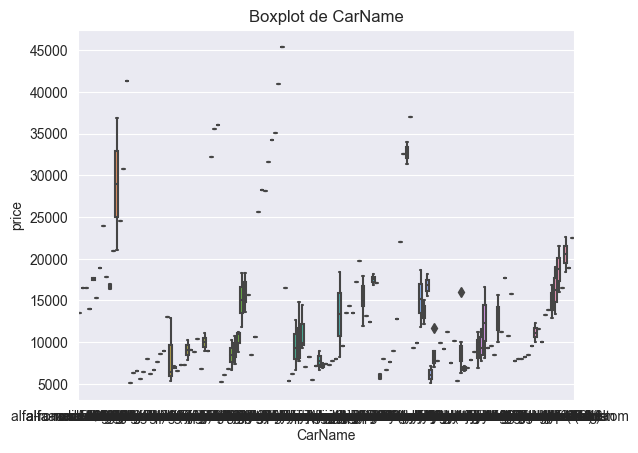

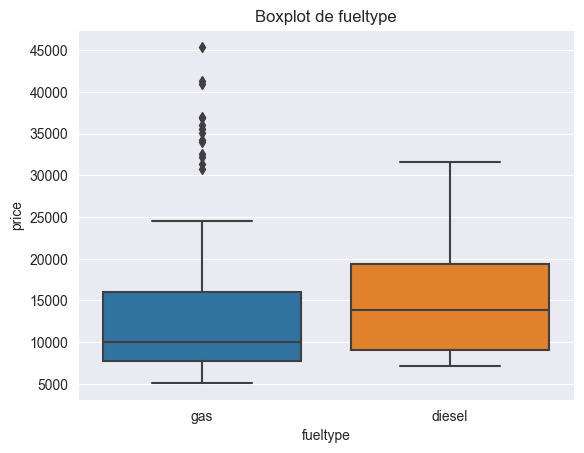

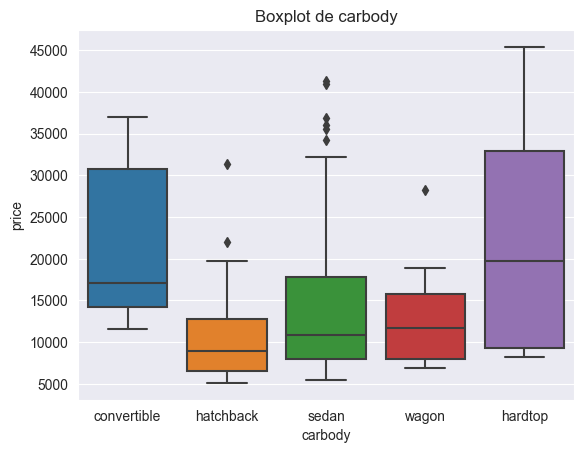

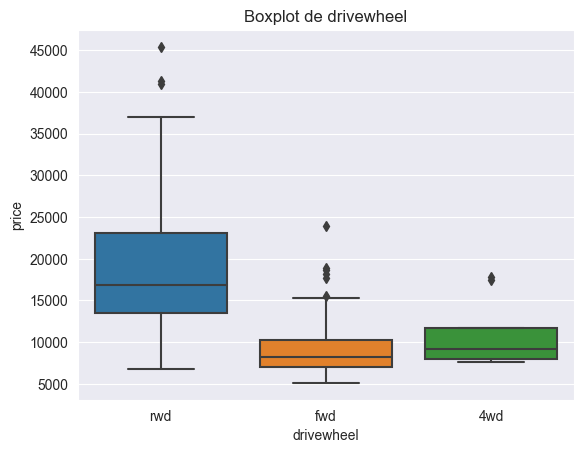

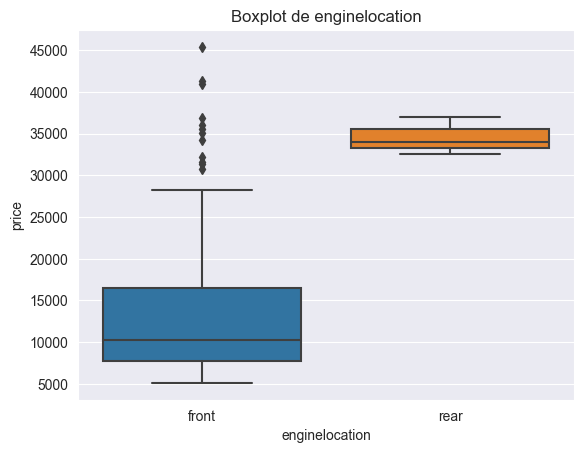

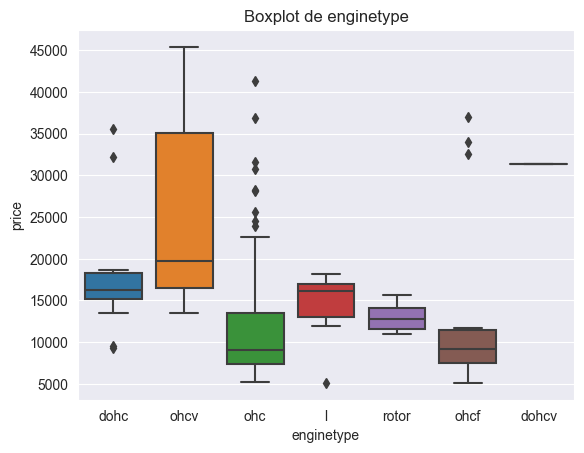

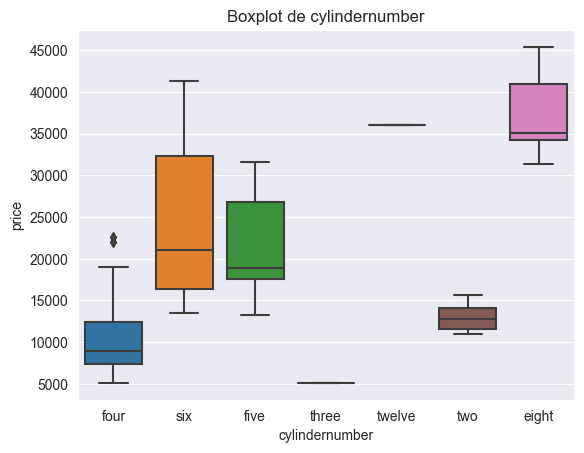

In [10]:
# Analiza asociación
for column in categorical_df.columns:
    plt.title(f"Boxplot de {column}")
    sns.boxplot(x=column, y="price", data=df)
    plt.show()

### 3. Identifica problemas de calidad de datos (valores faltantes, outliers, etc).

In [11]:
nan_counts = df.isna().sum()
print(nan_counts)
# No hay valores faltantes

symboling           0
CarName             0
fueltype            0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [12]:
for column in quantitative_df:
    # Conseguimos cuantil 1 y cuantil 3 
    Q1 = quantitative_df[column].quantile(0.25)
    Q3 = quantitative_df[column].quantile(0.75)
    #  Se consigue el rango intercuantil
    IQR = Q3 - Q1
    # mostramos todos los datos atípicos
    df_outliers = quantitative_df[
        ~((quantitative_df[column] >= (Q1 - 1.5 * IQR)) & (quantitative_df[column] <= (Q3 + 1.5 * IQR)))]
    print(f"Outliers de columna {column}: {df_outliers}")

Outliers de columna wheelbase:     wheelbase  carlength  carwidth  carheight  curbweight  enginesize  stroke  \
70      115.6      202.6      71.7       56.3        3770         183    3.64   
71      115.6      202.6      71.7       56.5        3740         234    3.10   
73      120.9      208.1      71.7       56.7        3900         308    3.35   

    compressionratio  horsepower  peakrpm  citympg  highwaympg    price  
70              21.5         123     4350       22          25  31600.0  
71               8.3         155     4750       16          18  34184.0  
73               8.0         184     4500       14          16  40960.0  
Outliers de columna carlength:     wheelbase  carlength  carwidth  carheight  curbweight  enginesize  stroke  \
18       88.4      141.1      60.3       53.2        1488          61    3.03   

    compressionratio  horsepower  peakrpm  citympg  highwaympg   price  
18               9.5          48     5100       47          53  5151.0  
Outliers

### 4. Con base en este análisis selecciona al menos 6 variables que consideres importantes para el análisis de las características de los automóviles que determinan su precio.

In [13]:
# Seleccionando columnas para el modelo
selected_columns = ["cylindernumber", "enginesize", "horsepower", "highwaympg", "carwidth", "curbweight", "price"]
selected_df = df[selected_columns]
selected_df

,cylindernumber,enginesize,horsepower,highwaympg,carwidth,curbweight,price
0,four,130,111,27,64.1,2548,13495.0
1,four,130,111,27,64.1,2548,16500.0
2,six,152,154,26,65.5,2823,16500.0
3,four,109,102,30,66.2,2337,13950.0
4,five,136,115,22,66.4,2824,17450.0
...,...,...,...,...,...,...,...
200,four,141,114,28,68.9,2952,16845.0
201,four,141,160,25,68.8,3049,19045.0
202,six,173,134,23,68.9,3012,21485.0
203,six,145,106,27,68.9,3217,22470.0


## Preparación de la base de datos

### 1. Selecciona el conjunto de datos a utilizar:

* Maneja datos categóricos: transforma variables dummy si es necesario.
* Maneja apropiadamente datos atípicos.

In [14]:
# Transformación de variables categóricas de columna "Cylinder Number" a datos dummy
word_to_num = {
    'zero': 0,
    'one': 1,
    'two': 2,
    'three': 3,
    'four': 4,
    'five': 5,
    'six': 6,
    'seven': 7,
    'eight': 8,
    'nine': 9,
    'ten': 10,
    'eleven': 11,
    'twelve': 12,
}
# Reemplazando los valores por dummies
selected_df["cylindernumber"] = selected_df["cylindernumber"].replace(word_to_num)

selected_df.to_csv("precios_autos_fixed.csv", index=False)

selected_df.head(5)

,cylindernumber,enginesize,horsepower,highwaympg,carwidth,curbweight,price
0,4,130,111,27,64.1,2548,13495.0
1,4,130,111,27,64.1,2548,16500.0
2,6,152,154,26,65.5,2823,16500.0
3,4,109,102,30,66.2,2337,13950.0
4,5,136,115,22,66.4,2824,17450.0


## Conclusión

El análisis que se realizó me permitió observar cual es el comportamiento de los datos tanto numéricos como categóricos. 
A partir de esta información pude realizar una limpieza de los datos de manera que se pudiera tener una mejor fuente de información para realizar un modelo en próximas etapas de este proyecto. 

Durante este análisis se utilizaron métodos de imputación y de estadística descriptiva. Se utilizó el rango intercuartil, por ejemplo, para ver si existían valores atípicos al igual que un mapa de calor para evaluar la correlación entre las variables y determinar si existirían problemas de colinealidad en los datos. 

Además, se diseñaron una serie de gráficas que nos ayudan a visualizar cómo se distribuyen los datos, examinar cuál es la distribución de los mismos y determinar si existen valores atípicos de manera visual. 

Los métodos implementados en este análisis sirven como un gran fundamento para poder progresar y diseñar un modelo predictivo del precio de los carros.


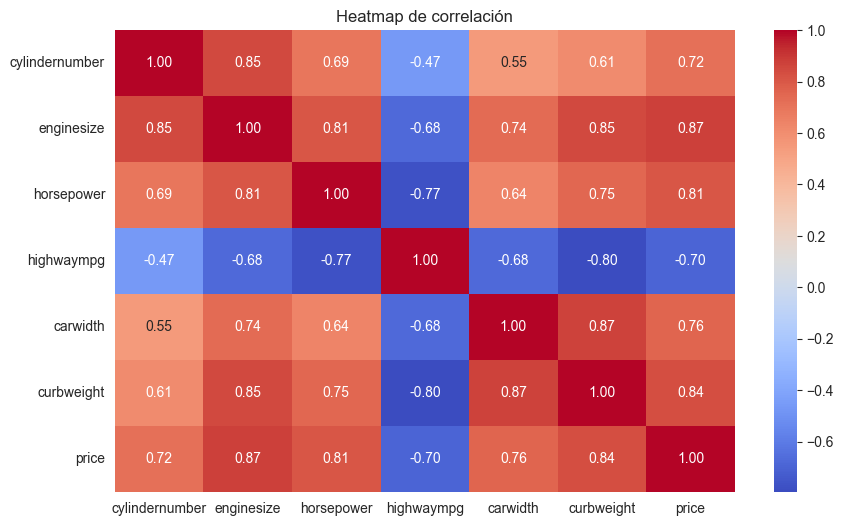

In [15]:
plt.figure(figsize=(10, 6))
sns.heatmap(selected_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap de correlación')
plt.show()

In [16]:
selected_df.corr()

,cylindernumber,enginesize,horsepower,highwaympg,carwidth,curbweight,price
cylindernumber,1.000000,0.846031,0.692016,-0.466666,0.545007,0.609727,0.718305
enginesize,0.846031,1.000000,0.809769,-0.677470,0.735433,0.850594,0.874145
horsepower,0.692016,0.809769,1.000000,-0.770544,0.640732,0.750739,0.808139
highwaympg,-0.466666,-0.677470,-0.770544,1.000000,-0.677218,-0.797465,-0.697599
carwidth,0.545007,0.735433,0.640732,-0.677218,1.000000,0.867032,0.759325
curbweight,0.609727,0.850594,0.750739,-0.797465,0.867032,1.000000,0.835305
price,0.718305,0.874145,0.808139,-0.697599,0.759325,0.835305,1.000000


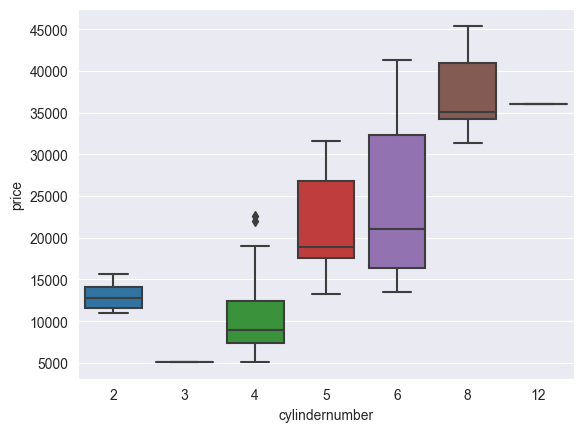

In [17]:
sns.boxplot(x='cylindernumber', y='price', data=selected_df)
plt.show()

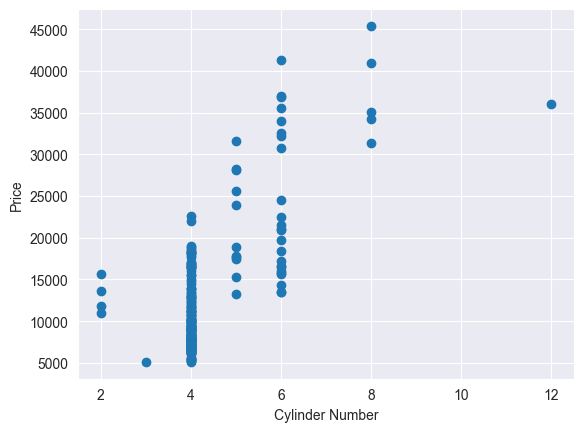

In [18]:
plt.scatter(selected_df['cylindernumber'], selected_df['price'])
plt.xlabel('Cylinder Number')
plt.ylabel('Price')
plt.show()

In [19]:
correlation = selected_df['cylindernumber'].corr(selected_df['price'], method='pearson')
print(f'Correlation between cylindernumber and price: {correlation}')

Correlation between cylindernumber and price: 0.7183049020002826
